In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.patches as mpatches
import lzma
import re

pd.options.display.max_colwidth = 100
pd.options.display.max_rows = 1000
#plt.style.use('ggplot')
plt.style.use('seaborn-paper')
mpl.rcParams['axes.linewidth'] = 0.7

In [2]:
def get_path(path):
    return re.search("(/[^/]+){2}$", path)[0][1:]

In [3]:
file = "results.json.xz"

data = None
if file.endswith('.xz'): file = lzma.open(file, 'rt')
data = pd.read_json(file)
data = data.sort_values(['file', 'mode'])

short_paths = data['file'].map( get_path )
data.update( short_paths )

In [4]:
succeeded = data[data.status == 'ok'][['file', 'mode', 'time_viper']]

In [5]:
len(succeeded)

258

In [6]:
states = set(data.status.values)
status_colors = {}
for s in states:
    if s == 'ok':
        c = 'green'
    elif s == 'cutintro_uncompressible':
        c = 'yellow'
    elif s == 'cutintro_termset_trivial':
        c = 'gold'
    elif 'timeout' in s:
        c = plt.cm.Blues(hash(s)/2**65+0.5)
    elif s.endswith('exception'):
        c = plt.cm.Reds(hash(s)/2**65+0.5)
    else:
        c = plt.cm.Greys(hash(s)/2**65+0.5)
    status_colors[s] = c

def plot_status(d, legend=True, **kwargs):
    plt.axis('equal')
    d.plot(kind='pie', autopct='%1.1f%%',
                        colors=[status_colors[s] for s in d.index], **kwargs) \
        .set_ylabel('')
    if legend: plt.legend(d.index, loc='center left', bbox_to_anchor=(1, 0.5))

In [7]:
data.groupby('status').size()

status
ok                          258
parsing_other_exception     200
saturated                   292
viper_timeout              1422
dtype: int64

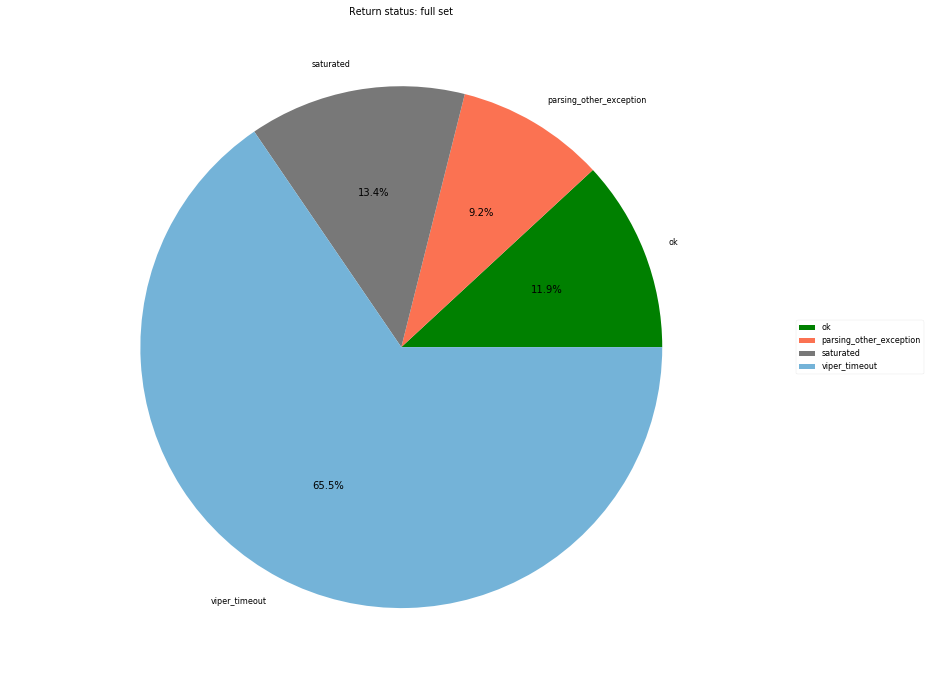

In [8]:
plot_status(data.groupby('status').size(), figsize=(14,12), title='Return status: full set')

In [9]:
succeeded.groupby('mode').size()

mode
analytic_independent    67
analytic_sequential     99
spind                   68
treegrammar             24
dtype: int64

In [10]:
independent_success = succeeded[succeeded['mode'] == 'analytic_independent']
independent_files = set(independent_success.T.loc['file'])

In [11]:
sequential_success = succeeded[succeeded['mode'] == 'analytic_sequential']
sequential_files = set(sequential_success.T.loc['file'])

In [12]:
spind_success = succeeded[succeeded['mode'] == 'spind']
spind_files = set(spind_success.T.loc['file'])

In [13]:
independent_files - spind_files

{'isaplanner/prop_02.smt2',
 'isaplanner/prop_07.smt2',
 'isaplanner/prop_14.smt2',
 'isaplanner/prop_15.smt2',
 'isaplanner/prop_26.smt2',
 'isaplanner/prop_29.smt2',
 'isaplanner/prop_30.smt2',
 'isaplanner/prop_35.smt2',
 'isaplanner/prop_36.smt2',
 'isaplanner/prop_38.smt2',
 'isaplanner/prop_43.smt2',
 'tip2015/int_mul_comm.smt2',
 'tip2015/int_mul_ident_right.smt2',
 'tip2015/list_nat_elem.smt2',
 'tip2015/list_return_2.smt2',
 'tip2015/weird_nat_add3_assoc1.smt2',
 'tip2015/weird_nat_add3_spec.smt2'}

In [14]:
spind_files - independent_files

{'isaplanner/prop_01.smt2',
 'isaplanner/prop_05.smt2',
 'isaplanner/prop_09.smt2',
 'isaplanner/prop_19.smt2',
 'isaplanner/prop_23.smt2',
 'isaplanner/prop_32.smt2',
 'isaplanner/prop_55.smt2',
 'isaplanner/prop_57.smt2',
 'isaplanner/prop_79.smt2',
 'isaplanner/prop_80.smt2',
 'prod/prop_15.smt2',
 'tip2015/nat_alt_mul_comm.smt2',
 'tip2015/nat_alt_mul_same.smt2',
 'tip2015/nat_boring_max_min_abs.smt2',
 'tip2015/nat_boring_min_idem.smt2',
 'tip2015/nat_lt_ne.smt2',
 'tip2015/nat_max_idem.smt2',
 'tip2015/regexp_RecEps.smt2'}

In [15]:
spind_files - sequential_files - independent_files

{'isaplanner/prop_57.smt2',
 'prod/prop_15.smt2',
 'tip2015/nat_boring_max_min_abs.smt2',
 'tip2015/nat_boring_min_idem.smt2',
 'tip2015/nat_max_idem.smt2',
 'tip2015/regexp_RecEps.smt2'}

In [16]:
succeeded.pivot_table( index=['file'], columns=['mode'] )

time_viper  \
mode                                          analytic_independent   
file                                                                 
false/productive_use_of_failure_app_inj1.smt2               7334.0   
isaplanner/prop_01.smt2                                        NaN   
isaplanner/prop_02.smt2                                    24406.0   
isaplanner/prop_03.smt2                                     9117.0   
isaplanner/prop_04.smt2                                     6691.0   
isaplanner/prop_05.smt2                                        NaN   
isaplanner/prop_06.smt2                                     3439.0   
isaplanner/prop_07.smt2                                     4052.0   
isaplanner/prop_08.smt2                                     3986.0   
isaplanner/prop_09.smt2                                        NaN   
isaplanner/prop_10.smt2                                     2853.0   
isaplanner/prop_11.smt2                                     1849.0   
isaplanner/prop_12.smt2                                        NaN   
isaplanner/prop_13.smt2                                     2342.0   
isaplanner/prop_14.smt2                                     5633.0   
isaplanner/prop_15.smt2                                     6113.0   
isaplanner/prop_16.smt2                                     2082.0   
isaplanner/prop_18.smt2                                     2953.0   
isaplanner/prop_19.smt2                                        NaN   
isaplanner/prop_21.smt2                                     3395.0   
isaplanner/prop_22.smt2                                        NaN   
isaplanner/prop_23.smt2                                        NaN   
isaplanner/prop_26.smt2                                    24433.0   
isaplanner/prop_27.smt2                                     6792.0   
isaplanner/prop_28.smt2                                     5399.0   
isaplanner/prop_29.smt2                                    13310.0   
isaplanner/prop_30.smt2                                    12273.0   
isaplanner/prop_31.smt2                                        NaN   
isaplanner/prop_32.smt2                                        NaN   
isaplanner/prop_35.smt2                                     3097.0   
isaplanner/prop_36.smt2                                     3401.0   
isaplanner/prop_37.smt2                                     4392.0   
isaplanner/prop_38.smt2                                     8696.0   
isaplanner/prop_39.smt2                                     4142.0   
isaplanner/prop_40.smt2                                     2190.0   
isaplanner/prop_42.smt2                                     2711.0   
isaplanner/prop_43.smt2                                     5105.0   
isaplanner/prop_44.smt2                                     3915.0   
isaplanner/prop_45.smt2                                     2240.0   
isaplanner/prop_46.smt2                                     2245.0   
isaplanner/prop_55.smt2                                        NaN   
isaplanner/prop_56.smt2                                        NaN   
isaplanner/prop_57.smt2                                        NaN   
isaplanner/prop_59.smt2                                        NaN   
isaplanner/prop_62.smt2                                     3319.0   
isaplanner/prop_70.smt2                                        NaN   
isaplanner/prop_76.smt2                                        NaN   
isaplanner/prop_79.smt2                                        NaN   
isaplanner/prop_80.smt2                                        NaN   
prod/prop_02.smt2                                              NaN   
prod/prop_03.smt2                                              NaN   
prod/prop_15.smt2                                              NaN   
prod/prop_37.smt2                                              NaN   
prod/prop_38.smt2                                              NaN   
tip2015/bin_nat_plus_comm.smt2                                 NaN

In [17]:
succeeded.pivot_table( index=['file'], columns=['mode'] ).sum()

            mode                
time_viper  analytic_independent    428031.0
            analytic_sequential     644432.0
            spind                   419486.0
            treegrammar             152372.0
dtype: float64